<a href="https://colab.research.google.com/github/Heimeinsheu/software_defects_phase1/blob/main/DissertationSMOTE_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SMOTE (Synthetic Minority Over-sampling Technique).**
The second resampling technique is called, Oversampling. This process is a little more complicated than undersampling. It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class. There are a number of methods used to oversample a dataset for a typical classification problem. The most common technique is called **SMOTE (Synthetic Minority Over-sampling Technique)**. In simple terms, it looks at the feature space for the minority class data points and considers its k nearest neighbours.

#Importing Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE

from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Mounted at /content/drive


In [ ]:
kc2_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/softwareDefect.csv")
jm1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/jm1.csv")
ar1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar1.csv")
ar3_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar3.csv")
ar4_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar4.csv")
ar5_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar5.csv")
ar6_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar6.csv")
kc1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/kc1.csv")
cm1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/cm1.csv")
pc1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/pc1.csv")

#Attribute Information:
 
 	
      1. loc             :   % McCabe's line count of code
      2. v(g)            :   % McCabe "cyclomatic complexity"
      3. ev(g)           :   % McCabe "essential complexity"
      4. iv(g)           :   % McCabe "design complexity"
      5. n               :   % Halstead total operators + operands
      6. v               :   % Halstead "volume"
      7. l               :   % Halstead "program length"
      8. d               :   % Halstead "difficulty"
      9. i               :   % Halstead "intelligence"
     10. e               :   % Halstead "effort"
     11. b               :   % Halstead 
     12. t               :   % Halstead's time estimator
     13. lOCode          :   % Halstead's line count
     14. lOComment       :   % Halstead's count of lines of comments
     15. lOBlank         :   % Halstead's count of blank lines
     16. lOCodeAndComment:  
     17. uniq_Op         :   % unique operators
     18. uniq_Opnd       :   % unique operands
     19. total_Op        :   % total operators
     20. total_Opnd      :   % total operands
     21. branchCount     :   % of the flow graph
     22. problems        : {no,yes}% module has/has not one or more 
                                   % reported defects


####**Calculate Numbers of Column in each dataset**

In [ ]:
print("attributes in jm1: ",jm1_df.shape[1])
print("attributes in ar1: ",ar1_df.shape[1])
print("attributes in ar3: ",ar3_df.shape[1])
print("attributes in ar4: ",ar4_df.shape[1])
print("attributes in ar5: ",ar5_df.shape[1])
print("attributes in ar6: ",ar6_df.shape[1])
print("attributes in kc1: ",kc1_df.shape[1])
print("attributes in cm1: ",cm1_df.shape[1])
print("attributes in pc1: ",pc1_df.shape[1])

attributes in jm1:  22
attributes in ar1:  30
attributes in ar3:  30
attributes in ar4:  30
attributes in ar5:  30
attributes in ar6:  30
attributes in kc1:  22
attributes in cm1:  22
attributes in pc1:  22


####**Assigning Header to each dataset**

In [ ]:
# adding column name to the respective columns
kc2_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
kc1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
cm1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
pc1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
jm1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
ar1_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','defects']
ar3_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','defects']
ar4_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','defects']
ar5_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','defects']
ar6_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','defects']


###**Checking type of each attribute in dataset.**

In [ ]:
print(kc1_df.dtypes)

l_count                    int64
cyclomatic_complexity      int64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                    bool
dtype: object


In [ ]:
print(kc2_df.dtypes)

l_count                    int64
cyclomatic_complexity    float64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                  object
dtype: object


In [ ]:
kc2_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1.0,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,yes
1,415,59.0,50,51,1159,8411.31,0.01,103.53,81.24,870848.58,...,359,35,9,10,47,106,692,467,106,yes
2,230,33.0,10,16,575,3732.82,0.03,39.82,93.74,148644.06,...,174,15,34,5,23,67,343,232,65,yes
3,175,26.0,12,13,500,3123.96,0.03,29.48,105.96,92103.07,...,142,7,19,4,18,58,310,190,51,yes
4,163,16.0,13,11,440,2714.77,0.03,32.25,84.14,87589.65,...,139,2,20,0,19,53,260,180,31,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,4,1.0,1,1,5,11.61,0.50,2.00,5.80,23.22,...,2,0,0,0,4,1,4,1,1,yes
517,4,1.0,1,1,4,8.00,0.67,1.50,5.33,12.00,...,2,0,0,0,3,1,3,1,1,yes
518,4,1.0,1,1,4,8.00,0.67,1.50,5.33,12.00,...,2,0,0,0,3,1,3,1,1,yes
519,4,1.0,1,1,5,11.61,0.67,1.50,7.74,17.41,...,2,0,0,0,3,2,3,2,1,yes


In [ ]:
print(jm1_df.dtypes)

l_count                    int64
cyclomatic_complexity      int64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                   object
uniq_Opnd                 object
total_Op                  object
total_Opnd                object
branchCount               object
problems                    bool
dtype: object


In [ ]:
jm1_df.loc[jm1_df['uniq_Op']=='?'].count()

l_count                  5
cyclomatic_complexity    5
essential_complexity     5
design_complexity        5
n                        5
v                        5
l                        5
d                        5
i                        5
e                        5
b                        5
t                        5
lOCode                   5
lOComment                5
lOBlank                  5
lOCodeAndComment         5
uniq_Op                  5
uniq_Opnd                5
total_Op                 5
total_Opnd               5
branchCount              5
problems                 5
dtype: int64

In [ ]:
jm1_df.drop(jm1_df.loc[jm1_df['uniq_Op']=="?"].index, inplace=True)

While converting attribute having object type into numeric type. I encounter many rows contain '?' value in respective attribute having object datatype.<br>
Performing drop() on that rows.

In [ ]:
jm1_df[['uniq_Op', 'uniq_Opnd','total_Op','total_Opnd','branchCount']] = jm1_df[['uniq_Op', 'uniq_Opnd','total_Op','total_Opnd','branchCount']].apply(pd.to_numeric)

In [ ]:
jm1_df.iloc[141:144,]

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
141,71,5,1,4,223,1338.00,0.06,16.07,83.25,21503.57,...,57,1,11,0,15,49,118,105,9,True
143,87,10,5,4,0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,18,True
144,19,2,1,2,43,188.87,0.12,8.64,21.87,1631.15,...,9,1,4,0,10,11,24,19,3,True


In [ ]:
print(pc1_df.dtypes)

l_count                    int64
cyclomatic_complexity      int64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                    bool
dtype: object


In [ ]:
print(cm1_df.dtypes)

l_count                    int64
cyclomatic_complexity      int64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                    bool
dtype: object


In [ ]:
print(ar1_df.dtypes)

total_loc                             int64
blank_loc                             int64
comment_loc                           int64
code_and_comment_loc                  int64
executable_loc                        int64
unique_operands                       int64
unique_operators                      int64
total_operands                        int64
total_operators                       int64
halstead_vocabulary                   int64
halstead_length                       int64
halstead_volume                       int64
halstead_level                      float64
halstead_difficulty                 float64
halstead_effort                     float64
halstead_error                      float64
halstead_time                       float64
branch_count                          int64
decision_count                        int64
call_pairs                            int64
condition_count                       int64
multiple_condition_count              int64
cyclomatic_complexity           

In [ ]:
print(ar3_df.dtypes)

total_loc                             int64
blank_loc                             int64
comment_loc                           int64
code_and_comment_loc                  int64
executable_loc                        int64
unique_operands                       int64
unique_operators                      int64
total_operands                        int64
total_operators                       int64
halstead_vocabulary                   int64
halstead_length                       int64
halstead_volume                       int64
halstead_level                      float64
halstead_difficulty                 float64
halstead_effort                     float64
halstead_error                      float64
halstead_time                       float64
branch_count                          int64
decision_count                        int64
call_pairs                            int64
condition_count                       int64
multiple_condition_count              int64
cyclomatic_complexity           

In [ ]:
print(ar4_df.dtypes)

total_loc                             int64
blank_loc                             int64
comment_loc                           int64
code_and_comment_loc                  int64
executable_loc                        int64
unique_operands                       int64
unique_operators                      int64
total_operands                        int64
total_operators                       int64
halstead_vocabulary                   int64
halstead_length                       int64
halstead_volume                       int64
halstead_level                      float64
halstead_difficulty                 float64
halstead_effort                     float64
halstead_error                      float64
halstead_time                       float64
branch_count                          int64
decision_count                        int64
call_pairs                            int64
condition_count                       int64
multiple_condition_count              int64
cyclomatic_complexity           

In [ ]:
print(ar5_df.dtypes)

total_loc                             int64
blank_loc                             int64
comment_loc                           int64
code_and_comment_loc                  int64
executable_loc                        int64
unique_operands                       int64
unique_operators                      int64
total_operands                        int64
total_operators                       int64
halstead_vocabulary                   int64
halstead_length                       int64
halstead_volume                       int64
halstead_level                      float64
halstead_difficulty                 float64
halstead_effort                     float64
halstead_error                      float64
halstead_time                       float64
branch_count                          int64
decision_count                        int64
call_pairs                            int64
condition_count                       int64
multiple_condition_count              int64
cyclomatic_complexity           

In [ ]:
print(ar6_df.dtypes)

total_loc                             int64
blank_loc                             int64
comment_loc                           int64
code_and_comment_loc                  int64
executable_loc                        int64
unique_operands                       int64
unique_operators                      int64
total_operands                        int64
total_operators                       int64
halstead_vocabulary                   int64
halstead_length                       int64
halstead_volume                       int64
halstead_level                      float64
halstead_difficulty                 float64
halstead_effort                     float64
halstead_error                      float64
halstead_time                       float64
branch_count                        float64
decision_count                        int64
call_pairs                            int64
condition_count                       int64
multiple_condition_count              int64
cyclomatic_complexity           

####**Converting attribute type from object to bool of respective dataset**
**kc2** is the only dataset that consist object type in **"problems"** attribute.

In [ ]:
kc2_df['problems'] = kc2_df['problems'].map({'yes':True ,'no':False})

In [ ]:
print(kc2_df.dtypes)

l_count                    int64
cyclomatic_complexity    float64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                    bool
dtype: object


####**Checking for null values**

In [ ]:
kc1_df.isnull().sum()

l_count                  0
cyclomatic_complexity    0
essential_complexity     0
design_complexity        0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
lOCodeAndComment         0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
problems                 0
dtype: int64

In [ ]:
kc2_df.isnull().sum()

l_count                  0
cyclomatic_complexity    0
essential_complexity     0
design_complexity        0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
lOCodeAndComment         0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
problems                 0
dtype: int64

In [ ]:
cm1_df.isnull().sum()

l_count                  0
cyclomatic_complexity    0
essential_complexity     0
design_complexity        0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
lOCodeAndComment         0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
problems                 0
dtype: int64

In [ ]:
pc1_df.isnull().sum()

l_count                  0
cyclomatic_complexity    0
essential_complexity     0
design_complexity        0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
lOCodeAndComment         0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
problems                 0
dtype: int64

In [ ]:
jm1_df.isnull().sum()

l_count                  0
cyclomatic_complexity    0
essential_complexity     0
design_complexity        0
n                        0
v                        0
l                        0
d                        0
i                        0
e                        0
b                        0
t                        0
lOCode                   0
lOComment                0
lOBlank                  0
lOCodeAndComment         0
uniq_Op                  0
uniq_Opnd                0
total_Op                 0
total_Opnd               0
branchCount              0
problems                 0
dtype: int64

In [ ]:
ar1_df.isnull().sum()

total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
ar3_df.isnull().sum()

total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
ar4_df.isnull().sum()

total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
ar5_df.isnull().sum()

total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

In [ ]:
ar6_df.isnull().sum()

total_loc                           0
blank_loc                           0
comment_loc                         0
code_and_comment_loc                0
executable_loc                      0
unique_operands                     0
unique_operators                    0
total_operands                      0
total_operators                     0
halstead_vocabulary                 0
halstead_length                     0
halstead_volume                     0
halstead_level                      0
halstead_difficulty                 0
halstead_effort                     0
halstead_error                      0
halstead_time                       0
branch_count                        0
decision_count                      0
call_pairs                          0
condition_count                     0
multiple_condition_count            0
cyclomatic_complexity               0
cyclomatic_density                  0
decision_density                    0
design_complexity                   0
design_densi

# Base measures: 
mu1             = number of unique operators<br>
mu2             = number of unique operands<br>
N1              = total occurrences of operators<br>
N2              = total occurrences of operands<br>
length     = N  = N1 + N2<br>
vocabulary = mu = mu1 + mu2<br><br>
**Constants set for each function:**<br>
mu1' =  2 = potential operator count (just the function name and the "return" operator)<br>
mu2'= potential operand count. (the number of arguments to the module)<br>    
For example, the expression "return max(w+x,x+y)" has "N1=4" operators "return, max, +,+)", "N2=4" operands (w,x,x,y),"mu1=3" unique operators (return, max,+), and "mu2=3" unique operands (w,x,y).<br>
<br> 
**Derived measures:**<br>
P = volume = V = N * log2(mu) (the number of mental comparisons needed to write a program of length N)<br>
V* = volume on minimal implementation = (2 + mu2')*log2(2 + mu2')<br>
L  = program length = V*/N<br>
D  = difficulty = 1/L<br>
L' = 1/D <br>
I  = intelligence = L'*V'<br>
E  = effort to write program = V/L<br> 
T  = time to write program = E/18 seconds<br>

###Class Imbalance in each dataset.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


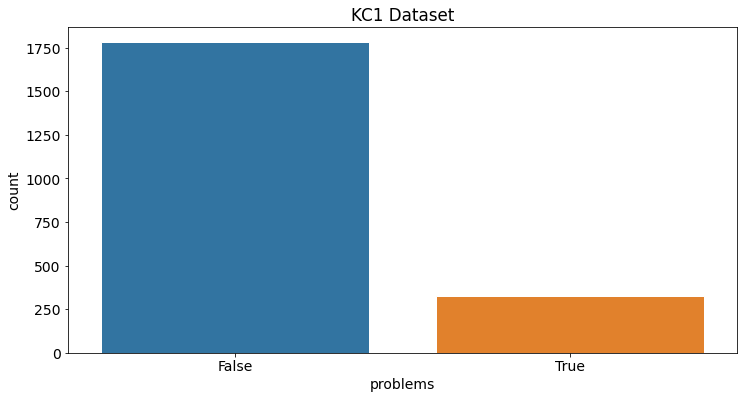

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('KC1 Dataset')
sns.set_style("darkgrid")

sns.countplot(kc1_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


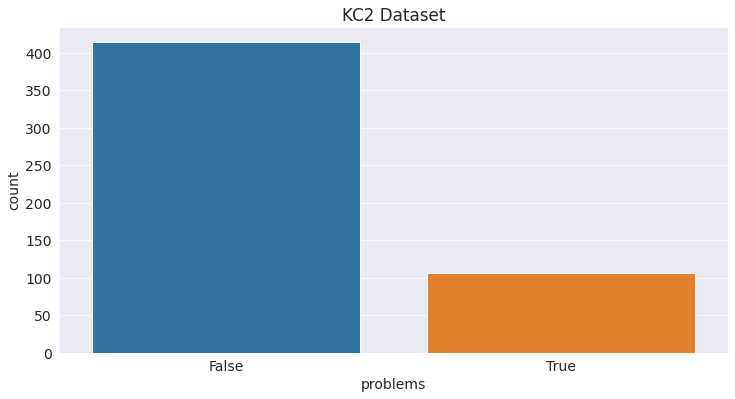

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('KC2 Dataset')
sns.set_style("darkgrid")

sns.countplot(kc2_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


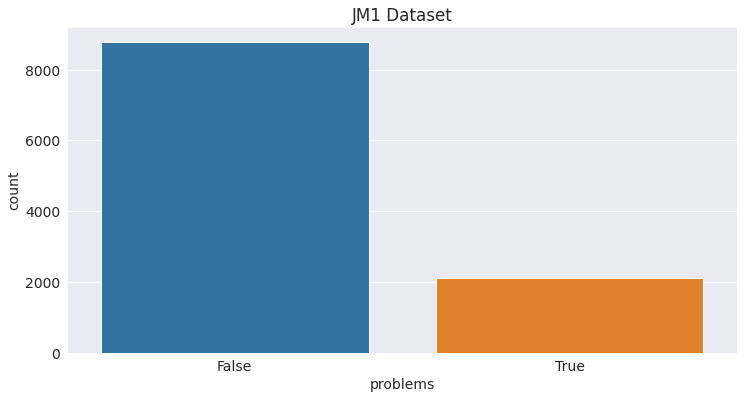

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('JM1 Dataset')
sns.set_style("darkgrid")

sns.countplot(jm1_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


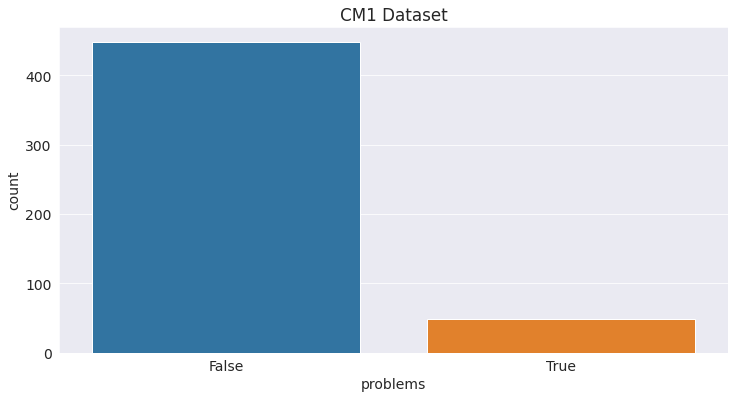

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('CM1 Dataset')
sns.set_style("darkgrid")

sns.countplot(cm1_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


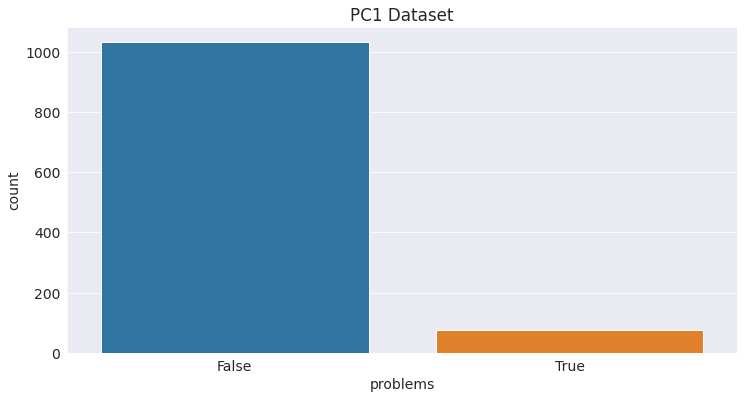

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('PC1 Dataset')
sns.set_style("darkgrid")

sns.countplot(pc1_df.problems);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


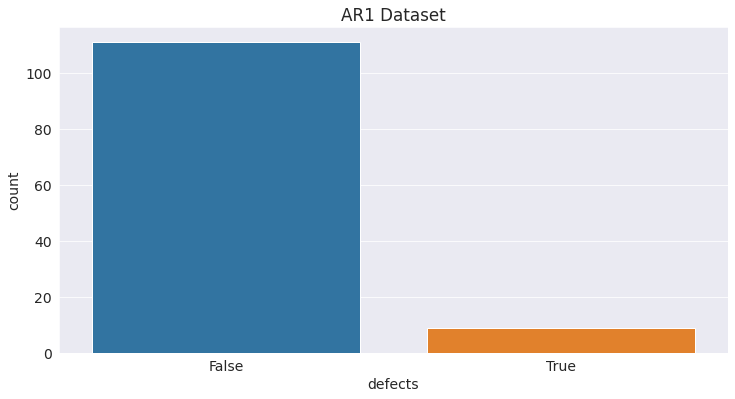

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR1 Dataset')
sns.set_style("darkgrid")

sns.countplot(ar1_df.defects);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


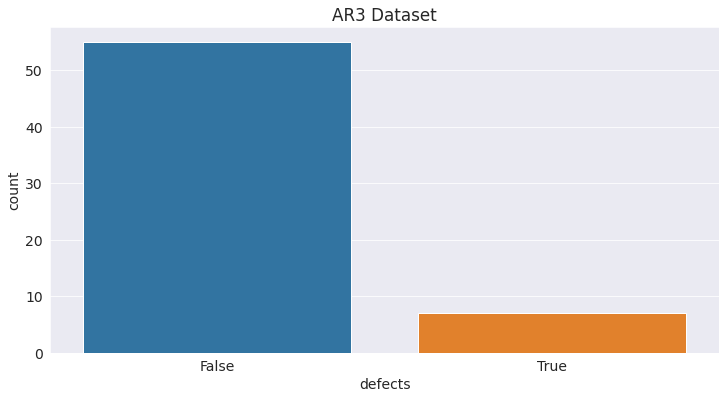

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR3 Dataset')
sns.set_style("darkgrid")

sns.countplot(ar3_df.defects);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


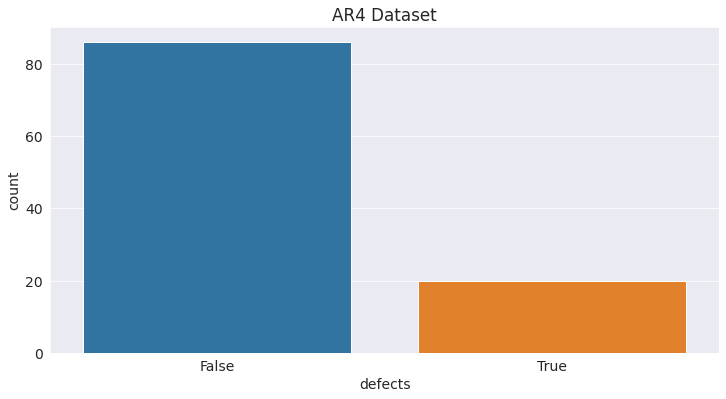

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR4 Dataset')
sns.set_style("darkgrid")

sns.countplot(ar4_df.defects);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


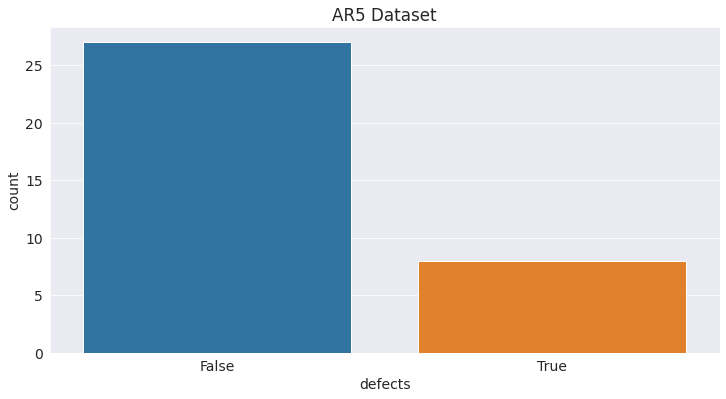

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR5 Dataset')
sns.set_style("darkgrid")

sns.countplot(ar5_df.defects);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


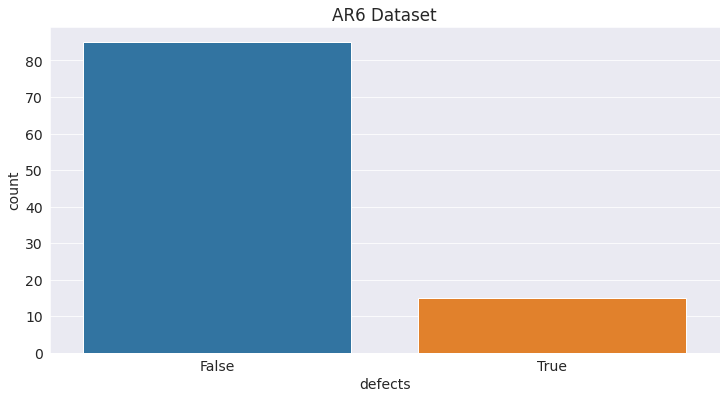

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('AR6 Dataset')
sns.set_style("darkgrid")

sns.countplot(ar6_df.defects);

In [ ]:
# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

#**kc2 Dataset**

In [ ]:
kc2_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1.0,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,415,59.0,50,51,1159,8411.31,0.01,103.53,81.24,870848.58,...,359,35,9,10,47,106,692,467,106,True
2,230,33.0,10,16,575,3732.82,0.03,39.82,93.74,148644.06,...,174,15,34,5,23,67,343,232,65,True
3,175,26.0,12,13,500,3123.96,0.03,29.48,105.96,92103.07,...,142,7,19,4,18,58,310,190,51,True
4,163,16.0,13,11,440,2714.77,0.03,32.25,84.14,87589.65,...,139,2,20,0,19,53,260,180,31,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,4,1.0,1,1,5,11.61,0.50,2.00,5.80,23.22,...,2,0,0,0,4,1,4,1,1,True
517,4,1.0,1,1,4,8.00,0.67,1.50,5.33,12.00,...,2,0,0,0,3,1,3,1,1,True
518,4,1.0,1,1,4,8.00,0.67,1.50,5.33,12.00,...,2,0,0,0,3,1,3,1,1,True
519,4,1.0,1,1,5,11.61,0.67,1.50,7.74,17.41,...,2,0,0,0,3,2,3,2,1,True


##**Spiliting DataSet**

Training: 80%
Testing: 20%



In [ ]:
x = kc2_df.iloc[:,:-1]
y = kc2_df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

##Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


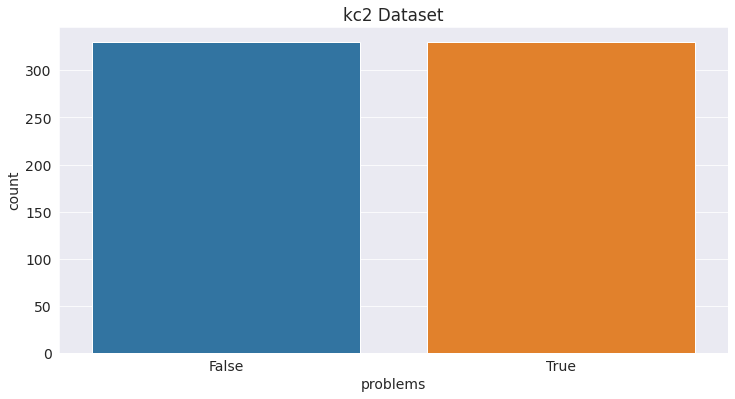

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

##**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=10)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=10)

In [ ]:
y_pred= classifier.predict(x_test)  
print(y_pred)

[False False False False False False  True False False False False  True
 False False  True False False False False False False False  True False
 False False False False False  True False False False False False False
 False  True  True False  True False False  True  True  True False False
 False  True False False False False False False  True False False False
 False False False  True  True False  True False False  True  True  True
 False False  True  True False False  True False False  True False False
 False  True False False False False False False False False False False
  True  True False False False False False False  True]


In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[69 15]
 [ 9 12]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  69 
False positives:  15 
False negatives:  9 
True Positives:  12


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7714285714285715

In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7714285714285715


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.82      0.85        84
        True       0.44      0.57      0.50        21

    accuracy                           0.77       105
   macro avg       0.66      0.70      0.68       105
weighted avg       0.80      0.77      0.78       105



In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.823 (0.011)
Cross Validation Scores:  [0.81226054 0.83461538]
Average CV Score:  0.823437960506926
Number of CV Scores used in Average:  2


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.827 (0.017)
Cross Validation Scores:  [0.8045977  0.83333333 0.84393064]
Average CV Score:  0.8272872234403029
Number of CV Scores used in Average:  3


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.824 (0.041)
Cross Validation Scores:  [0.75572519 0.84615385 0.86153846 0.83076923]
Average CV Score:  0.8235466823253084
Number of CV Scores used in Average:  4


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.827 (0.048)
Cross Validation Scores:  [0.76190476 0.88461538 0.77884615 0.86538462 0.84615385]
Average CV Score:  0.8273809523809523
Number of CV Scores used in Average:  5


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.821 (0.026)
Cross Validation Scores:  [0.77011494 0.83908046 0.81609195 0.83908046 0.85057471 0.81395349]
Average CV Score:  0.821482669517954
Number of CV Scores used in Average:  6


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.833 (0.041)
Cross Validation Scores:  [0.74666667 0.82666667 0.86666667 0.85135135 0.87837838 0.81081081
 0.85135135]
Average CV Score:  0.833127413127413
Number of CV Scores used in Average:  7


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.831 (0.063)
Cross Validation Scores:  [0.74242424 0.81538462 0.93846154 0.76923077 0.81538462 0.90769231
 0.8        0.86153846]
Average CV Score:  0.8312645687645688
Number of CV Scores used in Average:  8


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.820 (0.050)
Cross Validation Scores:  [0.70689655 0.79310345 0.87931034 0.84482759 0.79310345 0.82758621
 0.86206897 0.86206897 0.80701754]
Average CV Score:  0.8195536734556698
Number of CV Scores used in Average:  9


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.831 (0.056)
Cross Validation Scores:  [0.77358491 0.75       0.84615385 0.92307692 0.76923077 0.78846154
 0.90384615 0.84615385 0.84615385 0.86538462]
Average CV Score:  0.8312046444121914
Number of CV Scores used in Average:  10


##**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[67 17]
 [ 4 17]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  67 
False positives:  17 
False negatives:  4 
True Positives:  17


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.80      0.86        84
        True       0.50      0.81      0.62        21

    accuracy                           0.80       105
   macro avg       0.72      0.80      0.74       105
weighted avg       0.85      0.80      0.82       105



In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.825 (0.002)
Cross Validation Scores:  [0.82375479 0.82692308]
Average CV Score:  0.8253389330975538
Number of CV Scores used in Average:  2


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.837 (0.014)
Cross Validation Scores:  [0.83333333 0.82183908 0.85549133]
Average CV Score:  0.8368879144242909
Number of CV Scores used in Average:  3


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.827 (0.011)
Cross Validation Scores:  [0.80916031 0.83076923 0.83846154 0.83076923]
Average CV Score:  0.8272900763358779
Number of CV Scores used in Average:  4


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.833 (0.046)
Cross Validation Scores:  [0.82857143 0.84615385 0.75961538 0.90384615 0.82692308]
Average CV Score:  0.833021978021978
Number of CV Scores used in Average:  5


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.831 (0.024)
Cross Validation Scores:  [0.82758621 0.79310345 0.83908046 0.81609195 0.87356322 0.8372093 ]
Average CV Score:  0.8311057649469838
Number of CV Scores used in Average:  6


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.829 (0.019)
Cross Validation Scores:  [0.82666667 0.78666667 0.84       0.83783784 0.82432432 0.85135135
 0.83783784]
Average CV Score:  0.8292406692406693
Number of CV Scores used in Average:  7


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.829 (0.053)
Cross Validation Scores:  [0.81818182 0.76923077 0.90769231 0.78461538 0.78461538 0.92307692
 0.81538462 0.83076923]
Average CV Score:  0.8291958041958043
Number of CV Scores used in Average:  8


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.829 (0.032)
Cross Validation Scores:  [0.79310345 0.79310345 0.82758621 0.84482759 0.81034483 0.82758621
 0.89655172 0.86206897 0.80701754]
Average CV Score:  0.8291322175169724
Number of CV Scores used in Average:  9


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.835 (0.045)
Cross Validation Scores:  [0.83018868 0.82692308 0.82692308 0.86538462 0.78846154 0.75
 0.90384615 0.90384615 0.82692308 0.82692308]
Average CV Score:  0.8349419448476052
Number of CV Scores used in Average:  10


##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=10)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[75  9]
 [ 6 15]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  75 
False positives:  9 
False negatives:  6 
True Positives:  15


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8571428571428571


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.89      0.91        84
        True       0.62      0.71      0.67        21

    accuracy                           0.86       105
   macro avg       0.78      0.80      0.79       105
weighted avg       0.87      0.86      0.86       105



In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.810 (0.013)
Cross Validation Scores:  [0.79693487 0.82307692]
Average CV Score:  0.810005894488653
Number of CV Scores used in Average:  2


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.777 (0.041)
Cross Validation Scores:  [0.73563218 0.76436782 0.83236994]
Average CV Score:  0.7774566473988439
Number of CV Scores used in Average:  3


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.791 (0.048)
Cross Validation Scores:  [0.70992366 0.80769231 0.83076923 0.81538462]
Average CV Score:  0.7909424544920729
Number of CV Scores used in Average:  4


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.808 (0.033)
Cross Validation Scores:  [0.76190476 0.84615385 0.77884615 0.83653846 0.81730769]
Average CV Score:  0.8081501831501832
Number of CV Scores used in Average:  5


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.804 (0.034)
Cross Validation Scores:  [0.81609195 0.77011494 0.81609195 0.8045977  0.86206897 0.75581395]
Average CV Score:  0.804129911788292
Number of CV Scores used in Average:  6


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.797 (0.041)
Cross Validation Scores:  [0.8        0.72       0.86666667 0.81081081 0.78378378 0.81081081
 0.78378378]
Average CV Score:  0.7965508365508366
Number of CV Scores used in Average:  7


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.797 (0.049)
Cross Validation Scores:  [0.74242424 0.72307692 0.86153846 0.8        0.76923077 0.86153846
 0.78461538 0.83076923]
Average CV Score:  0.7966491841491842
Number of CV Scores used in Average:  8


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.798 (0.027)
Cross Validation Scores:  [0.75862069 0.77586207 0.77586207 0.82758621 0.84482759 0.81034483
 0.81034483 0.77586207 0.80701754]
Average CV Score:  0.7984808765208038
Number of CV Scores used in Average:  9


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.795 (0.043)
Cross Validation Scores:  [0.75471698 0.73076923 0.76923077 0.82692308 0.82692308 0.78846154
 0.80769231 0.88461538 0.75       0.80769231]
Average CV Score:  0.7947024673439768
Number of CV Scores used in Average:  10


##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[70 14]
 [11 10]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  70 
False positives:  14 
False negatives:  11 
True Positives:  10


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7619047619047619


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.83      0.85        84
        True       0.42      0.48      0.44        21

    accuracy                           0.76       105
   macro avg       0.64      0.65      0.65       105
weighted avg       0.77      0.76      0.77       105



In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.846 (0.011)
Cross Validation Scores:  [0.83524904 0.85769231]
Average CV Score:  0.8464706749189508
Number of CV Scores used in Average:  2


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.835 (0.028)
Cross Validation Scores:  [0.79885057 0.83908046 0.86705202]
Average CV Score:  0.8349943525347152
Number of CV Scores used in Average:  3


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.824 (0.035)
Cross Validation Scores:  [0.76335878 0.83846154 0.84615385 0.84615385]
Average CV Score:  0.8235320023487963
Number of CV Scores used in Average:  4


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.812 (0.035)
Cross Validation Scores:  [0.77142857 0.83653846 0.76923077 0.85576923 0.82692308]
Average CV Score:  0.8119780219780219
Number of CV Scores used in Average:  5


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.846 (0.021)
Cross Validation Scores:  [0.82758621 0.82758621 0.87356322 0.82758621 0.87356322 0.84883721]
Average CV Score:  0.8464537111289316
Number of CV Scores used in Average:  6


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.823 (0.021)
Cross Validation Scores:  [0.8        0.81333333 0.85333333 0.7972973  0.82432432 0.85135135
 0.82432432]
Average CV Score:  0.8234234234234236
Number of CV Scores used in Average:  7


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.829 (0.059)
Cross Validation Scores:  [0.75757576 0.78461538 0.92307692 0.8        0.78461538 0.92307692
 0.81538462 0.84615385]
Average CV Score:  0.8293123543123544
Number of CV Scores used in Average:  8


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.825 (0.041)
Cross Validation Scores:  [0.75862069 0.75862069 0.82758621 0.82758621 0.86206897 0.81034483
 0.84482759 0.87931034 0.85964912]
Average CV Score:  0.825401626672044
Number of CV Scores used in Average:  9


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.841 (0.049)
Cross Validation Scores:  [0.83018868 0.78846154 0.84615385 0.90384615 0.86538462 0.75
 0.92307692 0.86538462 0.82692308 0.80769231]
Average CV Score:  0.8407111756168361
Number of CV Scores used in Average:  10


##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[70 14]
 [11 10]]


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  70 
False positives:  14 
False negatives:  11 
True Positives:  10


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 0.990909090909091
Test data accuracy: 0.7904761904761904


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.82      0.86        84
        True       0.48      0.67      0.56        21

    accuracy                           0.79       105
   macro avg       0.70      0.74      0.71       105
weighted avg       0.82      0.79      0.80       105



In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.833 (0.005)
Cross Validation Scores:  [0.82758621 0.83846154]
Average CV Score:  0.8330238726790451
Number of CV Scores used in Average:  2


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.814 (0.019)
Cross Validation Scores:  [0.78735632 0.82183908 0.83236994]
Average CV Score:  0.8138551148317941
Number of CV Scores used in Average:  3


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.845 (0.019)
Cross Validation Scores:  [0.81679389 0.86923077 0.83846154 0.85384615]
Average CV Score:  0.8445830886670582
Number of CV Scores used in Average:  4


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.835 (0.031)
Cross Validation Scores:  [0.79047619 0.875      0.80769231 0.85576923 0.84615385]
Average CV Score:  0.8350183150183149
Number of CV Scores used in Average:  5


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.839 (0.022)
Cross Validation Scores:  [0.82758621 0.83908046 0.82758621 0.81609195 0.88505747 0.8372093 ]
Average CV Score:  0.8387686001960258
Number of CV Scores used in Average:  6


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.824 (0.030)
Cross Validation Scores:  [0.77333333 0.78666667 0.84       0.83783784 0.82432432 0.86486486
 0.83783784]
Average CV Score:  0.8235521235521235
Number of CV Scores used in Average:  7


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.825 (0.053)
Cross Validation Scores:  [0.8030303  0.78461538 0.92307692 0.8        0.81538462 0.90769231
 0.78461538 0.78461538]
Average CV Score:  0.8253787878787879
Number of CV Scores used in Average:  8


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.829 (0.047)
Cross Validation Scores:  [0.75862069 0.75862069 0.89655172 0.84482759 0.86206897 0.86206897
 0.82758621 0.86206897 0.78947368]
Average CV Score:  0.8290986085904417
Number of CV Scores used in Average:  9


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.822 (0.044)
Cross Validation Scores:  [0.79245283 0.76923077 0.82692308 0.86538462 0.80769231 0.75
 0.84615385 0.90384615 0.80769231 0.84615385]
Average CV Score:  0.8215529753265602
Number of CV Scores used in Average:  10


#**kc1 Dataset**

In [ ]:
kc1_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,83,11,1,11,171,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18,25,107,64,21,True
2,46,8,6,8,141,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16,28,89,52,15,True
3,25,3,1,3,58,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11,10,41,17,5,True
4,43,3,1,3,115,569.73,0.09,11.27,50.53,6423.73,...,35,2,4,0,11,20,74,41,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,19,2,1,2,40,175.69,0.15,6.82,25.77,1197.90,...,12,1,2,0,10,11,25,15,3,False
2104,23,3,3,3,60,278.63,0.10,9.69,28.75,2700.58,...,18,1,2,0,12,13,39,21,5,False
2105,2,1,1,1,4,8.00,0.67,1.50,5.33,12.00,...,0,0,0,0,3,1,3,1,1,False
2106,13,1,1,1,17,60.94,0.25,4.00,15.24,243.78,...,6,0,5,0,6,6,9,8,1,False


####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = kc1_df.iloc[:,:-1]
y = kc1_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


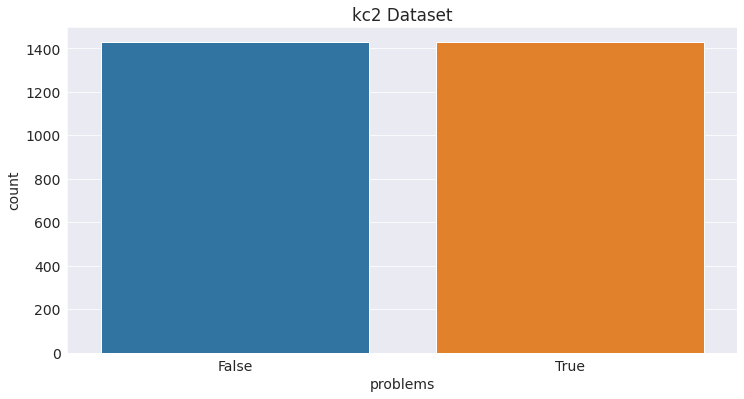

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Test Accuracy Score:  0.7630331753554502
Confusion Matrix: 
 [[277  76]
 [ 24  45]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  277 
False positives:  76 
False negatives:  24 
True Positives:  45


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.849 (0.001)
Cross Validation Scores:  [0.85009488 0.84819734]
Average CV Score:  0.849146110056926
Number of CV Scores used in Average:  2


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.846 (0.010)
Cross Validation Scores:  [0.83783784 0.84068279 0.86039886]
Average CV Score:  0.8463064954293026
Number of CV Scores used in Average:  3


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.844 (0.010)
Cross Validation Scores:  [0.83111954 0.85578748 0.83681214 0.85199241]
Average CV Score:  0.8439278937381405
Number of CV Scores used in Average:  4


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.851 (0.007)
Cross Validation Scores:  [0.85781991 0.83886256 0.85781991 0.847981   0.85035629]
Average CV Score:  0.8505679323659534
Number of CV Scores used in Average:  5


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.844 (0.018)
Cross Validation Scores:  [0.84375    0.82386364 0.85754986 0.84045584 0.87464387 0.82336182]
Average CV Score:  0.8439375053958388
Number of CV Scores used in Average:  6


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.850 (0.020)
Cross Validation Scores:  [0.85099338 0.82392027 0.85714286 0.86378738 0.83056478 0.88704319
 0.83388704]
Average CV Score:  0.84961984177623
Number of CV Scores used in Average:  7


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.847 (0.030)
Cross Validation Scores:  [0.85606061 0.81060606 0.86363636 0.85606061 0.87072243 0.81749049
 0.89353612 0.80608365]
Average CV Score:  0.846774541997926
Number of CV Scores used in Average:  8


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy: 0.847 (0.020)
Cross Validation Scores:  [0.84255319 0.8212766  0.85470085 0.85897436 0.85897436 0.82905983
 0.85897436 0.88034188 0.81623932]
Average CV Score:  0.8467883049443333
Number of CV Scores used in Average:  9


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#**cm1 Dataset**

In [ ]:
cm1_df

####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = cm1_df.iloc[:,:-1]
y = cm1_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#**pc1**

In [ ]:
pc1_df

####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = pc1_df.iloc[:,:-1]
y = pc1_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#**jm1**

In [ ]:
jm1_df

####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = jm1_df.iloc[:,:-1]
y = jm1_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#**ar1 Dataset**

In [ ]:
ar1_df

####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = ar1_df.iloc[:,:-1]
y = ar1_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#**ar3 Dataset**

In [ ]:
ar3_df

####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = ar3_df.iloc[:,:-1]
y = ar3_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#**ar4 Dataset**

In [ ]:
ar4_df

####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = ar4_df.iloc[:,:-1]
y = ar4_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#**ar5 Dataset**

In [ ]:
ar5_df

####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = ar5_df.iloc[:,:-1]
y = ar5_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#**ar6 Dataset**

In [ ]:
ar6_df

####**Spiliting Dataset**
training: 80% testing:20%

In [ ]:
x = ar6_df.iloc[:,:-1]
y = ar6_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

###Performing SMOTE in order to balance class imbalance problem.

In [ ]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Class become balanced as we can see in below class. Here we use OverSampling.**
<br>
Oversampling is solution to imbalanced data. Oversampling is the opposite of undersampling. Oversampling means making duplicates of the data that is the least present in our data set. We then add those duplicates to your data set.

In [ ]:
import seaborn as sns

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=14
plt.title('kc2 Dataset')
sns.set_style("darkgrid")

sns.countplot(y_train);

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)

score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

###**Support Vector Machine Algorithm**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Random Forest**

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##**Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=21)
dtree.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


In [ ]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=2, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=3, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=4, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=6, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=9, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv_outer)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))